# Fashion MNIST dataset

In [1]:
# Importing libraries
import tensorflow as tf
import pandas as pd
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

C:\Users\raksh\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


C:\Users\raksh\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\raksh\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


## Understanding the dataset and Pre-processing

In [2]:
#Loading data
data=fashion_mnist.load_data()

In [3]:
#Splitting the data into train and test
(X_train,y_train),(X_test,y_test)=data

### Displaying the number of classes 

In [4]:
len(np.unique(y_train))

10

### Displaying the dimensions of each image

In [5]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (60000, 28, 28)
Shape of X_test:  (10000, 28, 28)
Shape of y_train:  (60000,)
Shape of y_test:  (10000,)


### Displaying one image from each class

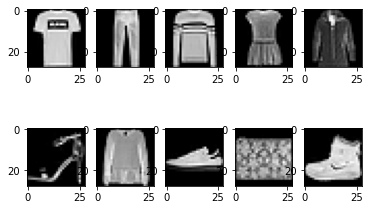

In [6]:
for i in range(0,10):
    plt.subplot(2,5,i+1)
    index=y_train.tolist().index(i)
    plt.imshow(X_train[index],cmap="gray")

### Normalization

In [7]:
X_train=X_train/255.0
X_test=X_test/255.0

## Performing experiments on Fully Connected Neural Networks (FCNN):

### Designing a FCNN for the dataset

In [8]:
# Creating a model
model=Sequential()
model.add(Flatten(input_shape=[28,28], name="input_layer"))
model.add(Dense(300, activation='relu', name='hidden1'))
model.add(Dense(100, activation='relu', name="hidden2"))
model.add(Dense(10, activation='softmax', name="output_layer"))                               

In [9]:
# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 hidden1 (Dense)             (None, 300)               235500    
                                                                 
 hidden2 (Dense)             (None, 100)               30100     
                                                                 
 output_layer (Dense)        (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# Compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam" ,metrics=["accuracy"])

### Training the network

In [11]:
# Fitting the model
epochs=20
batch_size=32
history=model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/20


1688/1688 [==============================] - 13s 6ms/step - loss: 0.4797 - accuracy: 0.8264 - val_loss: 0.3798 - val_accuracy: 0.8603
Epoch 2/20
1688/1688 [==============================] - 10s 6ms/step - loss: 0.3664 - accuracy: 0.8659 - val_loss: 0.3602 - val_accuracy: 0.8717
Epoch 3/20
1688/1688 [==============================] - 10s 6ms/step - loss: 0.3274 - accuracy: 0.8794 - val_loss: 0.3288 - val_accuracy: 0.8803
Epoch 4/20
1688/1688 [==============================] - 10s 6ms/step - loss: 0.3023 - accuracy: 0.8884 - val_loss: 0.3491 - val_accuracy: 0.8793
Epoch 5/20
1688/1688 [==============================] - 10s 6ms/step - loss: 0.2861 - accuracy: 0.8933 - val_loss: 0.3310 - val_accuracy: 0.8790
Epoch 6/20
1688/1688 [==============================] - 10s 6ms/step - loss: 0.2691 - accuracy: 0.8994 - val_loss: 0.3414 - val_accuracy: 0.8790
Epoch 7/20
1688/1688 [==============================] - 10s 6ms/step - loss: 0.2578 - accuracy: 0.9016 - val_loss: 0.3305 - val_

### Performance curves

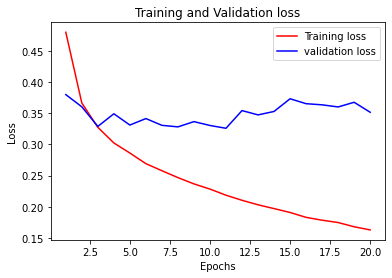

In [12]:
# Loss vs Epochs curve
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,21)
plt.plot(epochs, loss_train, 'r', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

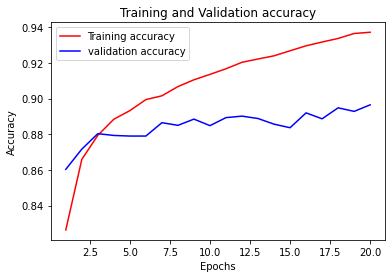

In [13]:
# Accuracy vs Epochs curve
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1,21)
plt.plot(epochs, acc_train, 'r', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Performing experiments on a Convolution Neural Networks (CNNs):

### Designing CNN-1 which contains:
### One convolution layer which uses 32 kernels each of size 5x5, stride=1 and padding=0.
### One pooling layer which uses MAXPOOLING with stride=2.
### One hidden layer having number of neurons=100

In [14]:
# Creating the first CNN model
cnn1=Sequential()
cnn1.add(keras.Input(shape=(28,28,1)))
cnn1.add(Conv2D(32,kernel_size=(5,5),strides=1, activation='relu', padding='valid'))
cnn1.add(MaxPooling2D(pool_size=(2,2), strides=2))
cnn1.add(Flatten())
cnn1.add(Dense(100, activation='relu'))
cnn1.add(Dense(10,activation='softmax'))

In [15]:
# Summary of the model
cnn1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 100)               460900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 462742 (1.77 MB)
Trainable params: 462742 (1.77 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [16]:
# Compiling the model
cnn1.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [17]:
# Fitting the model
epochs=10
batch_size=32
history1=cnn1.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 20s 11ms/step - loss: 0.4147 - accuracy: 0.8511 - val_loss: 0.3352 - val_accuracy: 0.8790
Epoch 2/10
1688/1688 [==============================] - 20s 12ms/step - loss: 0.2839 - accuracy: 0.8977 - val_loss: 0.2771 - val_accuracy: 0.9035
Epoch 3/10
1688/1688 [==============================] - 20s 12ms/step - loss: 0.2402 - accuracy: 0.9129 - val_loss: 0.2563 - val_accuracy: 0.9073
Epoch 4/10
1688/1688 [==============================] - 20s 12ms/step - loss: 0.2062 - accuracy: 0.9234 - val_loss: 0.2664 - val_accuracy: 0.9047
Epoch 5/10
1688/1688 [==============================] - 19s 11ms/step - loss: 0.1810 - accuracy: 0.9319 - val_loss: 0.2563 - val_accuracy: 0.9083
Epoch 6/10
1688/1688 [==============================] - 20s 12ms/step - loss: 0.1586 - accuracy: 0.9406 - val_loss: 0.2623 - val_accuracy: 0.9113
Epoch 7/10
1688/1688 [==============================] - 19s 11ms/step - loss: 0.1391 - accuracy: 0.9483 - val_loss: 0.2582 -

### Performance curves

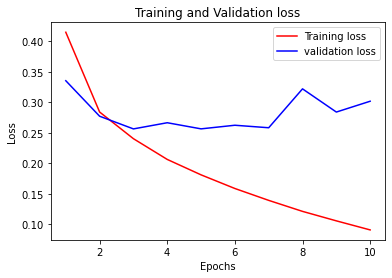

In [18]:
# Loss vs Epochs curve
loss_train = history1.history['loss']
loss_val = history1.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'r', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

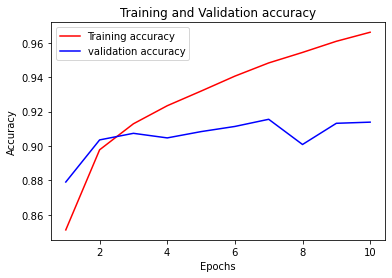

In [19]:
# Accuracy vs Epochs curve
acc_train = history1.history['accuracy']
acc_val = history1.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, acc_train, 'r', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Designing CNN-2 which contains:
### Two back-to-back Convolution layers which uses 32 kernels each of size 3x3, stride=1 and padding =0.
### One pooling layer which uses MAXPOOLING with stride=2.
### One hidden layer having number of neurons =100

In [20]:
# Creating the second CNN model
cnn2=Sequential()
cnn2.add(Input(shape=(28,28,1)))
cnn2.add(Conv2D(32,kernel_size=(3,3),strides=(1,1), activation='relu', padding='valid'))
cnn2.add(Conv2D(32,kernel_size=(3,3),strides=(1,1), activation='relu', padding='valid'))
cnn2.add(MaxPooling2D(strides=(2,2)))
cnn2.add(Flatten())
cnn2.add(Dense(100, activation='relu'))
cnn2.add(Dense(10,activation='softmax'))

In [21]:
# Summary of the model
cnn2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               460900    
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                      

In [22]:
# Compiling the model
cnn2.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

### Training the networks

In [23]:
# Fitting the model
epochs=10
batch_size=32
history2=cnn2.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 31s 17ms/step - loss: 0.3992 - accuracy: 0.8557 - val_loss: 0.3097 - val_accuracy: 0.8878
Epoch 2/10
1688/1688 [==============================] - 31s 18ms/step - loss: 0.2546 - accuracy: 0.9084 - val_loss: 0.2446 - val_accuracy: 0.9082
Epoch 3/10
1688/1688 [==============================] - 29s 17ms/step - loss: 0.2039 - accuracy: 0.9241 - val_loss: 0.2327 - val_accuracy: 0.9128
Epoch 4/10
1688/1688 [==============================] - 30s 18ms/step - loss: 0.1663 - accuracy: 0.9381 - val_loss: 0.2396 - val_accuracy: 0.9140
Epoch 5/10
1688/1688 [==============================] - 30s 18ms/step - loss: 0.1342 - accuracy: 0.9500 - val_loss: 0.2409 - val_accuracy: 0.9173
Epoch 6/10
1688/1688 [==============================] - 27s 16ms/step - loss: 0.1084 - accuracy: 0.9597 - val_loss: 0.2598 - val_accuracy: 0.9180
Epoch 7/10
1688/1688 [==============================] - 28s 16ms/step - loss: 0.0844 - accuracy: 0.9697 - val_loss: 0.2783 -

### Performance curves

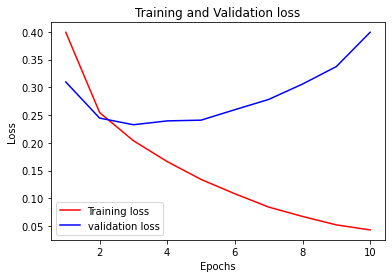

In [24]:
# Plotting the Loss vs Epochs curve
loss_train = history2.history['loss']
loss_val = history2.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'r', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

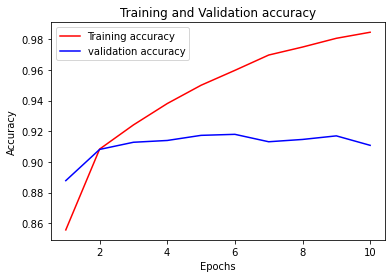

In [25]:
# Comparing the Accuracy vs Epochs curve
acc_train = history2.history['accuracy']
acc_val = history2.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, acc_train, 'r', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Comparing the performances of CNN-1 and CNN-2

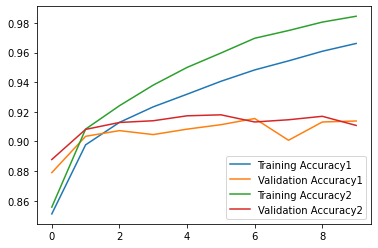

In [26]:
training_accuracy2 = history2.history['accuracy']
validation_accuracy2 = history2.history['val_accuracy']
training_accuracy1 = history1.history['accuracy']
validation_accuracy1 = history1.history['val_accuracy']
plt.plot(training_accuracy1, label='Training Accuracy1')
plt.plot(validation_accuracy1, label='Validation Accuracy1')
plt.plot(training_accuracy2, label='Training Accuracy2')
plt.plot(validation_accuracy2, label='Validation Accuracy2')
plt.legend()

In [27]:
# We can see from the above graph that the training as well as validation 
# accuracy of CNN2 is higher than that of CNN1

## Comparing the performances of FCNN and CNN

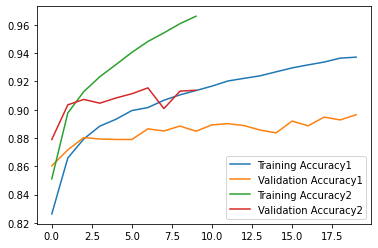

In [28]:
training_accuracy_fcnn = history.history['accuracy']
validation_accuracy_fcnn = history.history['val_accuracy']
training_accuracy_cnn1 = history1.history['accuracy']
validation_accuracy_cnn1 = history1.history['val_accuracy']
plt.plot(training_accuracy_fcnn, label='Training Accuracy1')
plt.plot(validation_accuracy_fcnn, label='Validation Accuracy1')
plt.plot(training_accuracy_cnn1, label='Training Accuracy2')
plt.plot(validation_accuracy_cnn1, label='Validation Accuracy2')
plt.legend()

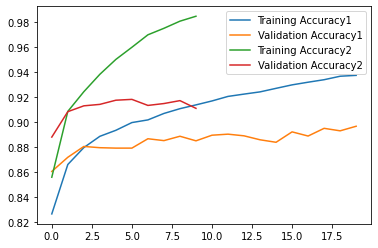

In [29]:
training_accuracy_fcnn = history.history['accuracy']
validation_accuracy_fcnn = history.history['val_accuracy']
training_accuracy_cnn2 = history2.history['accuracy']
validation_accuracy_cnn2 = history2.history['val_accuracy']
plt.plot(training_accuracy_fcnn, label='Training Accuracy1')
plt.plot(validation_accuracy_fcnn, label='Validation Accuracy1')
plt.plot(training_accuracy_cnn2, label='Training Accuracy2')
plt.plot(validation_accuracy_cnn2, label='Validation Accuracy2')
plt.legend()

In [30]:
# From the above two graphs we can say that the accuracy of CNN1 and CNN2 is higher than FCNN

## Comparing the number of parameters in the FCNN and the CNN

In [31]:
# The total number of parameters in FCNN are 266610
# The total number of parameters in CNN1 are 462742 and in CNN2 are 471478

## Computational efficiency of both networks

In [32]:
# When we compare the computational efficiency, we can say that CNN2 is better than CNN1 as
# the performance of CNN2 is better than CNN1.

In [33]:
# If the model has more number of parameters, it takes longer to train the model.
# So we can say that CNN2 took more time than CNN1.

## Accuracy

In [34]:
fcnn_loss, fcnn_accuracy = model.evaluate(X_test, y_test)
print(f"FCNN Model Accuracy: {fcnn_accuracy * 100:.2f}%")

313/313 [==============================] - 1s 4ms/step - loss: 0.3746 - accuracy: 0.8882
FCNN Model Accuracy: 88.82%


In [35]:
cnn1_loss, cnn1_accuracy = cnn1.evaluate(X_test, y_test)
print(f"CNN1 Model Accuracy: {cnn1_accuracy * 100:.2f}%")

313/313 [==============================] - 2s 5ms/step - loss: 0.3128 - accuracy: 0.9123
CNN1 Model Accuracy: 91.23%


In [36]:
cnn2_loss, cnn2_accuracy = cnn2.evaluate(X_test, y_test)
print(f"CNN2 Model Accuracy: {cnn2_accuracy * 100:.2f}%")

313/313 [==============================] - 2s 7ms/step - loss: 0.4021 - accuracy: 0.9158
CNN2 Model Accuracy: 91.58%
